In [38]:
%pwd

'C:\\Users\\hn93h'

In [36]:
import pandas as pd
import numpy as np
from scipy import stats

In [12]:
X = pd.DataFrame(np.random.randn(5,3),columns=["A","B","C"])
X['D'] = pd.Series(['a','a','a','b','b'])

In [16]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
A = np.arange(1,5)
B = A**2
C = A**3

No handles with labels found to put in legend.


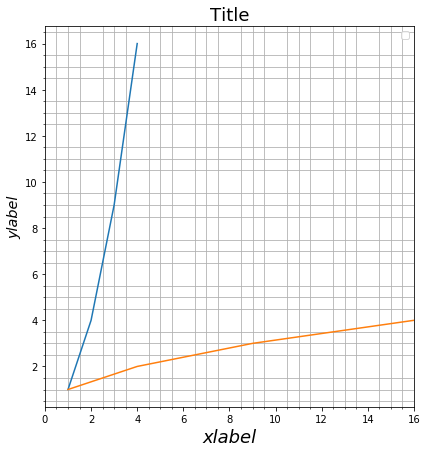

In [20]:
fig, ax = plt.subplots(figsize=(14,7))
# fig, ax = plt.subplots(2,1,figsize(14,7))
# ax[0].***
# ax[1].***
ax.plot(A,B)
ax.plot(B,A)
ax.set_title('Title',fontsize=18)
ax.set_xlabel('xlabel', fontsize=18,fontfamily = 'sans-serif',fontstyle='italic')
ax.set_ylabel('ylabel', fontsize='x-large',fontstyle='oblique')
ax.legend()

ax.set_aspect('equal') 
ax.minorticks_on() 
ax.set_xlim(0,16) 
ax.grid(which='minor', axis='both')

ax.xaxis.set_tick_params(rotation=45,labelsize=18,colors='w') 
start, end = ax.get_xlim() 
ax.xaxis.set_ticks(np.arange(start, end,1)) 
ax.yaxis.tick_right()


0    False
1    False
2    False
3    False
4     True
5     True
6    False
7    False
8     True
9    False
dtype: bool
    value1  value2
0     True    True
1     True    True
2     True    True
3     True    True
4    False    True
5    False   False
6     True   False
7     True    True
8    False    True
9     True   False
10    True    True
0      True
1      True
2      True
3      True
4     False
5     False
6      True
7      True
8     False
9      True
10     True
Name: value1, dtype: bool
0    12.0
1    33.0
2    45.0
3    23.0
6    66.0
7    54.0
9    99.0
dtype: float64
    value1 value2
0     12.0      a
1     33.0      b
2     45.0      c
3     23.0      d
4      NaN      e
7     54.0      f
8      NaN      g
10   190.0      g
0    12.0
1    33.0
2    45.0
3    23.0
6    66.0
7    54.0
9    99.0
dtype: float64
0      12.0
1      33.0
2      45.0
3      23.0
6      66.0
7      54.0
9      99.0
10    190.0
Name: value1, dtype: float64
0    12.0
1    33.0
2    45.0
3    

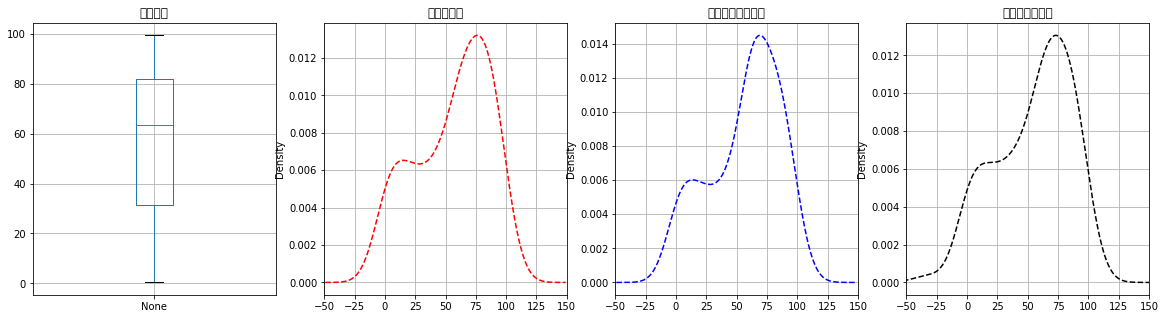

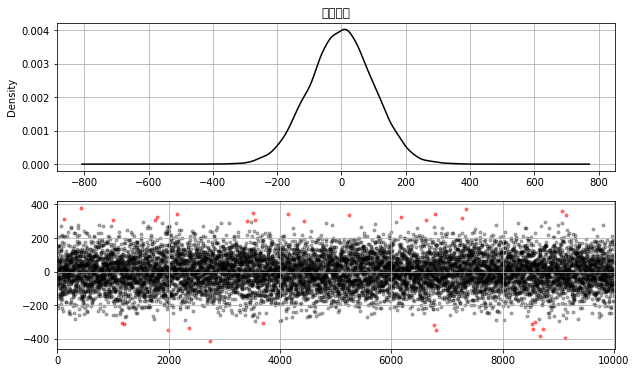

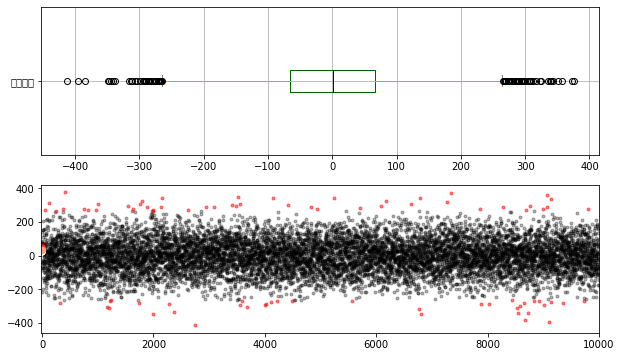

In [37]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
% matplotlib inline
########################################################################################################3
s = pd.Series([12,33,45,23,np.nan,np.nan,66,54,np.nan,99])
df = pd.DataFrame({'value1':[12,33,45,23,np.nan,np.nan,66,54,np.nan,99,190],
                  'value2':['a','b','c','d','e',np.nan,np.nan,'f','g',np.nan,'g']})
df

print(s.isnull())  # Series直接判断是否是缺失值，返回一个Series
print(df.notnull())  # Dataframe直接判断是否是缺失值，返回一个Series
print(df['value1'].notnull())  # 通过索引判断

s2 = s[~s.isnull()]  

df2 = df[df['value2'].notnull()]    
# 注意和 df2 = df[df['value2'].notnull()]['value1'] 的区别
print(s2)
print(df2)
# 筛选非缺失值

#########################################################################################################3#
# 删除缺失值 - dropna
s = pd.Series([12,33,45,23,np.nan,np.nan,66,54,np.nan,99])
df = pd.DataFrame({'value1':[12,33,45,23,np.nan,np.nan,66,54,np.nan,99,190],
                  'value2':['a','b','c','d','e',np.nan,np.nan,'f','g',np.nan,'g']})


# 创建数据
s.dropna(inplace = True)
df2 = df['value1'].dropna()
print(s)
print(df2)
# drop方法：可直接用于Series，Dataframe
# 注意inplace参数，默认False → 生成新的值


# 填充/替换缺失数据 - fillna、replace

s = pd.Series([12,33,45,23,np.nan,np.nan,66,54,np.nan,99])
df = pd.DataFrame({'value1':[12,33,45,23,np.nan,np.nan,66,54,np.nan,99,190],
                  'value2':['a','b','c','d','e',np.nan,np.nan,'f','g',np.nan,'g']})
# 创建数据

s.fillna(0,inplace = True)
print(s)
print('------')
# s.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, **kwargs)
# value：填充值
# 注意inplace参数

df['value1'].fillna(method = 'pad',inplace = True)
print(df)
print('------')
# method参数：
# pad / ffill → 用之前的数据填充 
# backfill / bfill → 用之后的数据填充 

s = pd.Series([1,1,1,1,2,2,2,3,4,5,np.nan,np.nan,66,54,np.nan,99])
s.replace(np.nan,'缺失数据',inplace = True)
print(s)
print('------')
# df.replace(to_replace=None, value=None, inplace=False, limit=None, regex=False, method='pad', axis=None)
# to_replace → 被替换的值
# value → 替换值

s.replace([1,2,3],np.nan,inplace = True)
print(s)
# 多值用np.nan代替

#################################################################################################################
# 缺失值插补
# 几种思路：均值/中位数/众数插补、临近值插补、插值法
# （1）均值/中位数/众数插补

s = pd.Series([1,2,3,np.nan,3,4,5,5,5,5,np.nan,np.nan,6,6,7,12,2,np.nan,3,4])
#print(s)
print('------')
# 创建数据

u = s.mean()     # 均值
me = s.median()  # 中位数
mod = s.mode()   # 众数
print('均值为：%.2f, 中位数为：%.2f' % (u,me))
print('众数为：', mod.tolist())
print('------')
# 分别求出均值/中位数/众数

s.fillna(u,inplace = True)
print(s)
# 用均值填补

# 缺失值插补
# 几种思路：均值/中位数/众数插补、临近值插补、插值法
# （2）临近值插补

s = pd.Series([1,2,3,np.nan,3,4,5,5,5,5,np.nan,np.nan,6,6,7,12,2,np.nan,3,4])
#print(s)
print('------')
# 创建数据

s.fillna(method = 'ffill',inplace = True)
print(s)
# 用前值插补


# 缺失值插补
# 几种思路：均值/中位数/众数插补、临近值插补、插值法
# （3）插值法 —— 拉格朗日插值法
from scipy.interpolate import lagrange
x = [3, 6, 9]
y = [10, 8, 4]
print(lagrange(x,y))
print(type(lagrange(x,y)))
# 的输出值为的是多项式的n个系数
# 这里输出3个值，分别为a0,a1,a2
# y = a0 * x**2 + a1 * x + a2 → y = -0.11111111 * x**2 + 0.33333333 * x + 10

print('插值10为：%.2f' % lagrange(x,y)(10))
print('------')
# -0.11111111*100 + 0.33333333*10 + 10 = -11.11111111 + 3.33333333 +10 = 2.22222222

###############################################################################################
# 缺失值插补
# 几种思路：均值/中位数/众数插补、临近值插补、插值法
# （3）插值法 —— 拉格朗日插值法，实际运用

data = pd.Series(np.random.rand(100)*100)
data[3,6,33,56,45,66,67,80,90] = np.nan
print(data.head())
print('总数据量:%i' % len(data))
print('------')
# 创建数据

data_na = data[data.isnull()]
print('缺失值数据量:%i' % len(data_na))
print('缺失数据占比:%.2f%%' % (len(data_na) / len(data) * 100))
# 缺失值的数量

data_c = data.fillna(data.median())  #  中位数填充缺失值
fig,axes = plt.subplots(1,4,figsize = (20,5))
data.plot.box(ax = axes[0],grid = True,title = '数据分布')
data.plot(kind = 'kde',style = '--r',ax = axes[1],grid = True,title = '删除缺失值',xlim = [-50,150])
data_c.plot(kind = 'kde',style = '--b',ax = axes[2],grid = True,title = '缺失值填充中位数',xlim = [-50,150])
# 密度图查看缺失值情况

def na_c(s,n,k=5):
    y = s[list(range(n-k,n+1+k))] # 取数
    y = y[y.notnull()]  # 剔除空值
    return(lagrange(y.index,list(y))(n))
# 创建函数，做插值，由于数据量原因，以空值前后5个数据（共10个数据）为例做插值

na_re = []
for i in range(len(data)):
    if data.isnull()[i]:
        data[i] = na_c(data,i)
        print(na_c(data,i))
        na_re.append(data[i])
data.dropna(inplace=True)  # 清除插值后仍存在的缺失值
data.plot(kind = 'kde',style = '--k',ax = axes[3],grid = True,title = '拉格朗日插值后',xlim = [-50,150])
print('finished!')
# 缺失值插值

###########################################################################################################
# 异常值分析
# （1）3σ原则：如果数据服从正态分布，异常值被定义为一组测定值中与平均值的偏差超过3倍的值 → p(|x - μ| > 3σ) ≤ 0.003

data = pd.Series(np.random.randn(10000)*100)
# 创建数据

u = data.mean()  # 计算均值
std = data.std()  # 计算标准差
stats.kstest(data, 'norm', (u, std))
print('均值为：%.3f，标准差为：%.3f' % (u,std))
print('------')
# 正态性检验

fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,1,1)
data.plot(kind = 'kde',grid = True,style = '-k',title = '密度曲线')

# 绘制数据密度曲线

ax2 = fig.add_subplot(2,1,2)
error = data[np.abs(data - u) > 3*std]
data_c = data[np.abs(data - u) <= 3*std]
print('异常值共%i条' % len(error))
# 筛选出异常值error、剔除异常值之后的数据data_c

plt.scatter(data_c.index,data_c,color = 'k',marker='.',alpha = 0.3)
plt.scatter(error.index,error,color = 'r',marker='.',alpha = 0.5)
plt.xlim([-10,10010])
plt.grid()
# 图表表达

# 异常值分析
# （2）箱型图分析

fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,1,1)
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
data.plot.box(vert=False, grid = True,color = color,ax = ax1,label = '样本数据')
# 箱型图看数据分布情况
# 以内限为界

s = data.describe()
print(s)
print('------')
# 基本统计量

q1 = s['25%']
q3 = s['75%']
iqr = q3 - q1
mi = q1 - 1.5*iqr
ma = q3 + 1.5*iqr
print('分位差为：%.3f，下限为：%.3f，上限为：%.3f' % (iqr,mi,ma))
print('------')
# 计算分位差

ax2 = fig.add_subplot(2,1,2)
error = data[(data < mi) | (data > ma)]
data_c = data[(data >= mi) & (data <= ma)]
print('异常值共%i条' % len(error))
# 筛选出异常值error、剔除异常值之后的数据data_c

plt.scatter(data_c.index,data_c,color = 'k',marker='.',alpha = 0.3)
plt.scatter(error.index,error,color = 'r',marker='.',alpha = 0.5)
plt.xlim([-10,10010])
plt.grid()
# 图表表达

################################################################################################
# 数据标准化
# （1）0-1标准化
# 将数据的最大最小值记录下来，并通过Max-Min作为基数（即Min=0，Max=1）进行数据的归一化处理
# x = (x - Min) / (Max - Min)

df = pd.DataFrame({"value1":np.random.rand(10)*20,
                  'value2':np.random.rand(10)*100})
print(df.head())
print('------')
# 创建数据

def data_norm(df,*cols):
    df_n = df.copy()
    for col in cols:
        ma = df_n[col].max()
        mi = df_n[col].min()
        df_n[col + '_n'] = (df_n[col] - mi) / (ma - mi)
    return(df_n)
# 创建函数，标准化数据

df_n = data_norm(df,'value1','value2')
print(df_n.head())
# 标准化数据
# 数据标准化
# （2）Z-score标准化
# Z分数（z-score）,是一个分数与平均数的差再除以标准差的过程 → z=(x-μ)/σ，其中x为某一具体分数，μ为平均数，σ为标准差
# Z值的量代表着原始分数和母体平均值之间的距离，是以标准差为单位计算。在原始分数低于平均值时Z则为负数，反之则为正数
# 数学意义：一个给定分数距离平均数多少个标准差?

df = pd.DataFrame({"value1":np.random.rand(10) * 100,
                  'value2':np.random.rand(10) * 100})
print(df.head())
print('------')
# 创建数据

def data_Znorm(df, *cols):
    df_n = df.copy()
    for col in cols:
        u = df_n[col].mean()
        std = df_n[col].std()
        df_n[col + '_Zn'] = (df_n[col] - u) / std
    return(df_n)
# 创建函数，标准化数据

df_z = data_Znorm(df,'value1','value2')
u_z = df_z['value1_Zn'].mean()
std_z = df_z['value1_Zn'].std()
print(df_z)
print('标准化后value1的均值为:%.2f, 标准差为：%.2f' % (u_z, std_z))
# 标准化数据
# 经过处理的数据符合标准正态分布，即均值为0，标准差为1

# 什么情况用Z-score标准化：
# 在分类、聚类算法中，需要使用距离来度量相似性的时候，Z-score表现更好
#########################################################################################################
# 等宽法 → 将数据均匀划分成n等份，每份的间距相等
# cut方法

ages=[20,22,25,27,21,23,37,31,61,45,41,32]
# 有一组人员年龄数据，希望将这些数据划分为“18到25”,“26到35”,“36到60”,“60以上”几个面元

bins = [18,25,35,60,100]
cats = pd.cut(ages,bins)
print(cats)
print(type(cats))
print('-------')
# 返回的是一个特殊的Categorical对象 → 一组表示面元名称的字符串

print(cats.codes, type(cats.codes))  # 0-3对应分组后的四个区间，用代号来注释数据对应区间，结果为ndarray
print(cats.categories, type(cats.categories))  # 四个区间，结果为index
print(pd.value_counts(cats))  # 按照区间计数
print('-------')
# cut结果含有一个表示不同分类名称的层级数组以及一个年龄数据进行标号的代号属性

print(pd.cut(ages,[18,26,36,61,100],right=False))
print('-------')
# 通过right函数修改闭端，默认为True

group_names=['Youth','YoungAdult','MiddleAged','Senior']
print(pd.cut(ages,bins,labels=group_names))
print('-------')
# 可以设置自己的区间名称，用labels参数

df = pd.DataFrame({'ages':ages})
group_names=['Youth','YoungAdult','MiddleAged','Senior']
s = pd.cut(df['ages'],bins)  # 也可以 pd.cut(df['ages'],5),将数据等分为5份
df['label'] = s
cut_counts = s.value_counts(sort=False) 
print(df)
print(cut_counts)
# 对一个Dataframe数据进行离散化，并计算各个区间的数据计数

plt.scatter(df.index,df['ages'],cmap = 'Reds',c = cats.codes)
plt.grid()
# 用散点图表示，其中颜色按照codes分类
# 注意codes是来自于Categorical对象

# 等频法 → 以相同数量的记录放进每个区间
# qcut方法

data = np.random.randn(1000)
s = pd.Series(data)
cats = pd.qcut(s,4)  # 按四分位数进行切割，可以试试 pd.qcut(data,10)
print(cats.head())
print(pd.value_counts(cats))
print('------')
# qcut → 根据样本分位数对数据进行面元划分，得到大小基本相等的面元，但并不能保证每个面元含有相同数据个数
# 也可以设置自定义的分位数（0到1之间的数值，包含端点） → pd.qcut(data1,[0,0.1,0.5,0.9,1])

plt.scatter(s.index,s,cmap = 'Greens',c = pd.qcut(data,4).codes)
plt.xlim([0,1000])
plt.grid()
# 用散点图表示，其中颜色按照codes分类
# 注意codes是来自于Categorical对象

######################################################################################################